In [293]:
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import plot_confusion_matrix

#other
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc, roc_auc_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

!pip install xgboost
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [349]:
#read dataset
preprocessed_df = pd.read_csv('./Data/preprocessed_df.cvs', index_col = 0) 
preprocessed_df.head()

,status_group,amount_tsh,gps_height,longitude,latitude,population,age,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,...,scheme_name_group_m,scheme_name_group_machumba estate pipe line,scheme_name_group_makwale water supplied sche,scheme_name_group_mkongoro one,scheme_name_group_n,scheme_name_group_ngana water supplied scheme,scheme_name_group_other,scheme_name_group_s,scheme_name_group_uroki-bomang'ombe water sup,scheme_name_group_wanging'ombe water
0,1,6000.0,1390,34.938093,-9.856322,109,14,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.0,1399,34.698766,-2.147466,280,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,25.0,686,37.460664,-3.821329,250,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,263,38.486161,-11.155298,58,27,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0,31.130847,-1.825359,150,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [350]:
preprocessed_df.shape

(59400, 287)

In [351]:
#define X and y
y = preprocessed_df['status_group']
X = preprocessed_df.drop(['status_group'], axis = 1)

In [297]:
#perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Data Transformation

After splitting the data into training and test sets, we use the `MixMaxScaler()` to fit and transform `X_train` and transform `X_test` of continuous variables.

We want to fit and transform only the training data because in a real-world setting, we only have access to this data. We can then use the same scalar object to transform the test data. 

If we to first transform the data and then split into training and test sets, it will lead to data-leakage. 

In [299]:
#scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

# Decision Tree

In [330]:
#instantiate baseline model
decision_tree_clf = DecisionTreeClassifier(random_state = 21, criterion = 'entropy')

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

Train accuracy: 99.75346886092288
Test accuracy: 75.2861952861953


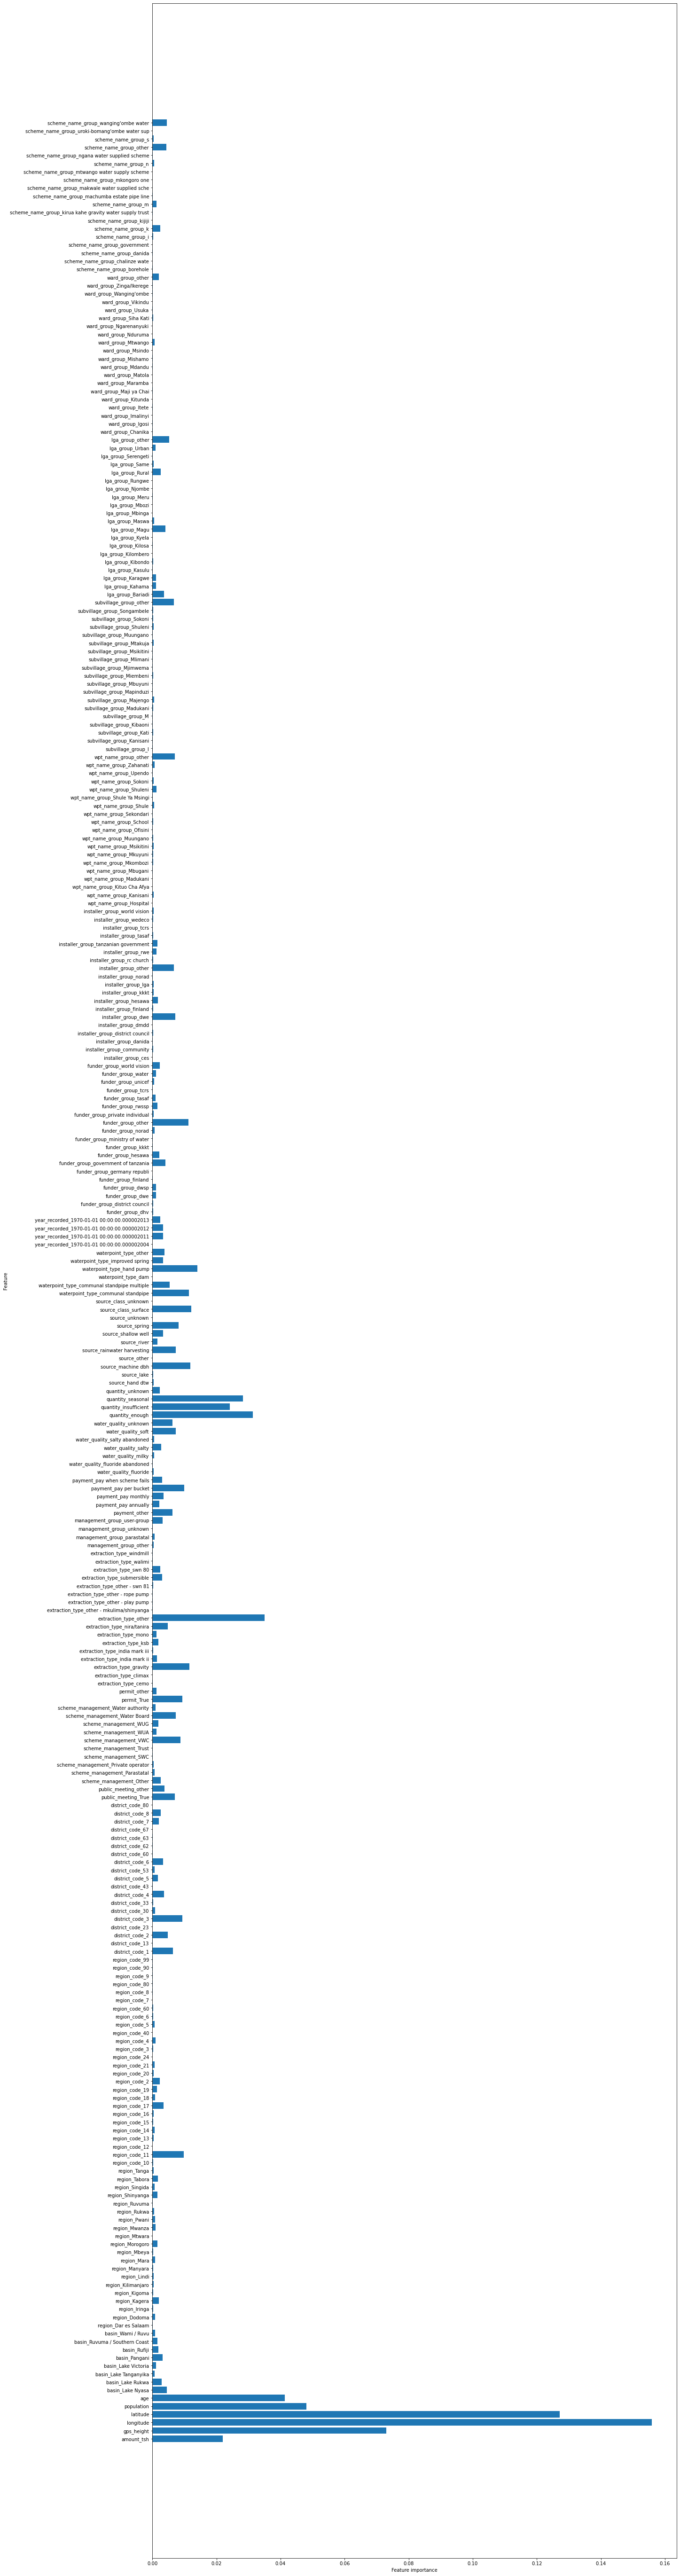

In [331]:
#feature importance
decision_tree_clf.feature_importances_;

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize = (20, 100))
    plt.barh(range(n_features), model.feature_importances_, align = 'center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(decision_tree_clf)

#save
plt.savefig('./Data/decision_tree_clf_feature_importances')

In [337]:
#look for columns with 'ward'
preprocessed_df.filter(like = 'ward').columns

Index(['ward_group_Chanika', 'ward_group_Igosi', 'ward_group_Imalinyi',
       'ward_group_Itete', 'ward_group_Kitunda', 'ward_group_Maji ya Chai',
       'ward_group_Maramba', 'ward_group_Matola', 'ward_group_Mdandu',
       'ward_group_Mishamo', 'ward_group_Msindo', 'ward_group_Mtwango',
       'ward_group_Nduruma', 'ward_group_Ngarenanyuki', 'ward_group_Siha Kati',
       'ward_group_Usuka', 'ward_group_Vikindu', 'ward_group_Wanging'ombe',
       'ward_group_Zinga/Ikerege', 'ward_group_other'],
      dtype='object')

In [338]:
#look for columns with 'subvillage'
preprocessed_df.filter(like = 'subvillage').columns

Index(['subvillage_group_I', 'subvillage_group_Kanisani',
       'subvillage_group_Kati', 'subvillage_group_Kibaoni',
       'subvillage_group_M', 'subvillage_group_Madukani',
       'subvillage_group_Majengo', 'subvillage_group_Mapinduzi',
       'subvillage_group_Mbuyuni', 'subvillage_group_Miembeni',
       'subvillage_group_Mjimwema', 'subvillage_group_Mlimani',
       'subvillage_group_Msikitini', 'subvillage_group_Mtakuja',
       'subvillage_group_Muungano', 'subvillage_group_Shuleni',
       'subvillage_group_Sokoni', 'subvillage_group_Songambele',
       'subvillage_group_other'],
      dtype='object')

In [339]:
#look for columns with 'wpt_name'
preprocessed_df.filter(like = 'wpt_name').columns

Index(['wpt_name_group_Hospital', 'wpt_name_group_Kanisani',
       'wpt_name_group_Kituo Cha Afya', 'wpt_name_group_Madukani',
       'wpt_name_group_Mbugani', 'wpt_name_group_Mkombozi',
       'wpt_name_group_Mkuyuni', 'wpt_name_group_Msikitini',
       'wpt_name_group_Muungano', 'wpt_name_group_Ofisini',
       'wpt_name_group_School', 'wpt_name_group_Sekondari',
       'wpt_name_group_Shule', 'wpt_name_group_Shule Ya Msingi',
       'wpt_name_group_Shuleni', 'wpt_name_group_Sokoni',
       'wpt_name_group_Upendo', 'wpt_name_group_Zahanati',
       'wpt_name_group_other'],
      dtype='object')

In [341]:
#drop features
X.drop(columns = ['ward_group_Chanika', 'ward_group_Igosi', 'ward_group_Imalinyi',
       'ward_group_Itete', 'ward_group_Kitunda', 'ward_group_Maji ya Chai',
       'ward_group_Maramba', 'ward_group_Matola', 'ward_group_Mdandu',
       'ward_group_Mishamo', 'ward_group_Msindo', 'ward_group_Mtwango',
       'ward_group_Nduruma', 'ward_group_Ngarenanyuki', 'ward_group_Siha Kati',
       'ward_group_Usuka', 'ward_group_Vikindu', "ward_group_Wanging'ombe",
       'ward_group_Zinga/Ikerege', 'ward_group_other'], axis = 1, inplace = True)

In [342]:
#drop features
X.drop(columns = ['subvillage_group_I', 'subvillage_group_Kanisani',
       'subvillage_group_Kati', 'subvillage_group_Kibaoni',
       'subvillage_group_M', 'subvillage_group_Madukani',
       'subvillage_group_Majengo', 'subvillage_group_Mapinduzi',
       'subvillage_group_Mbuyuni', 'subvillage_group_Miembeni',
       'subvillage_group_Mjimwema', 'subvillage_group_Mlimani',
       'subvillage_group_Msikitini', 'subvillage_group_Mtakuja',
       'subvillage_group_Muungano', 'subvillage_group_Shuleni',
       'subvillage_group_Sokoni', 'subvillage_group_Songambele',
       'subvillage_group_other'], axis = 1, inplace = True)

In [343]:
#drop features
X.drop(columns = ['wpt_name_group_Hospital', 'wpt_name_group_Kanisani',
       'wpt_name_group_Kituo Cha Afya', 'wpt_name_group_Madukani',
       'wpt_name_group_Mbugani', 'wpt_name_group_Mkombozi',
       'wpt_name_group_Mkuyuni', 'wpt_name_group_Msikitini',
       'wpt_name_group_Muungano', 'wpt_name_group_Ofisini',
       'wpt_name_group_School', 'wpt_name_group_Sekondari',
       'wpt_name_group_Shule', 'wpt_name_group_Shule Ya Msingi',
       'wpt_name_group_Shuleni', 'wpt_name_group_Sokoni',
       'wpt_name_group_Upendo', 'wpt_name_group_Zahanati',
       'wpt_name_group_other'], axis = 1, inplace = True)

In [352]:
#re-perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [353]:
#re-scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

# Deal with Class Imbalance

In [354]:
#previous original class distribution
print('Class Distribution Before:')
print('Train Set')
print(y_train.value_counts())

#fit
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#check class distribution
print('\n')
print('Class Distribution After:')
print('Train Set')
print(pd.Series(y_train).value_counts())

Class Distribution Before:
Train Set
1    25825
0    18210
2     3485
Name: status_group, dtype: int64


Class Distribution After:
Train Set
2    25825
1    25825
0    25825
Name: status_group, dtype: int64


In [359]:
#instantiate improved model
decision_tree_clf = DecisionTreeClassifier(random_state = 21, criterion = 'entropy')

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

Train accuracy: 99.80509841884478
Test accuracy: 75.32828282828284


In [360]:
#set param grid
decision_tree_param_grid = {'criterion' : ['gini', 'entropy'],
                            'min_samples_split' : [8, 10],
                            'min_samples_leaf' : [3, 4, 5],
                            'max_depth': [40, 80],
                            'max_features': ['auto', 'sqrt', 'log2']}

#gridsearch
decision_tree_gridsearch = GridSearchCV(estimator = decision_tree_clf, 
                                        param_grid = decision_tree_param_grid,
                                        scoring = 'accuracy', 
                                        cv = 5,
                                        n_jobs = -1)

#fit
decision_tree_gridsearch.fit(X_train, y_train)

#best param
decision_tree_gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [ ]:
#get cross-validation result
decision_tree_cross_val_results = pd.DataFrame(decision_tree_gridsearch.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(decision_tree_cross_val_results))

decision_tree_cross_val_results.head()

In [361]:
#train a classifier with optimal values identified above
decision_tree_clf = DecisionTreeClassifier(random_state = 21, 
                                           criterion = 'gini',
                                           max_depth = 40,
                                           max_features = 'auto',
                                           min_samples_leaf = 3,
                                           min_samples_split = 8)

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

Train accuracy: 80.34075508228462
Test accuracy: 69.21717171717172


In [362]:
#train cross validation
decision_tree_train_cv_score = cross_val_score(decision_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_train_cv_score)

#test cross validation
decision_tree_test_cv_score = cross_val_score(decision_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_test_cv_score)

Train cross validation: 0.7458535011293966
Train cross validation: 0.6909932659932659


In [363]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.352020202020202
Mean Squared Error: 0.4404040404040404
Root Mean Squared Error: 0.6636294451002309


In [364]:
#classification report
decision_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', decision_tree_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      4614
           1       0.79      0.70      0.74      6434
           2       0.28      0.55      0.37       832

    accuracy                           0.69     11880
   macro avg       0.60      0.65      0.61     11880
weighted avg       0.73      0.69      0.71     11880



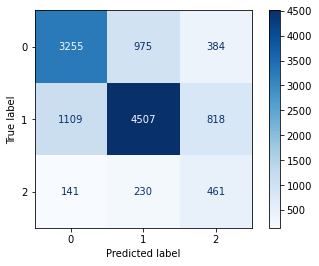

In [365]:
#plot confusion matrix
plot_confusion_matrix(decision_tree_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [366]:
#function bias() to calculate the bias of a model's predictions given the actual data
def bias(y, y_hat):
    return np.mean(y_hat - y)

#function variance() to calculate the variance of a model's predictions
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.07912457912457913
0.4619630366515889


In [369]:
#summary table
summary_table = pd.DataFrame({'Model': [],
                              'Accuracy': [], 'CV': [], 
                              'Precision': [], 'Recall': [], 'F1 Score': [],
                              'MAE': [], 'MSE': [], 'RMSE': [],
                              'AUC': [], 'Bias': [], 'Variance': []
                              })

summary_table.loc[0] = ['Decision Tree',
                        round(decision_tree_test_accuracy, 2), round(decision_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Logistic Regression,75.03,0.74,0.67,0.56,0.58,0.30,0.41,0.64,0.82,-0.165152,0.269192
2,Decision Tree,69.22,0.69,0.60,0.65,0.61,0.35,0.44,0.66,-,0.079125,0.461963
1,Decision Tree,69.22,0.69,0.60,0.65,0.61,0.35,0.44,0.66,-,0.079125,0.461963


# Logistic Regression

In [370]:
#instantiate baseline model
logreg_clf = LogisticRegression(fit_intercept = False, C = 1e12, random_state = 21)

#fit
logreg_clf.fit(X_train, y_train)

#predict
y_hat_train = logreg_clf.predict(X_train)
y_hat_test = logreg_clf.predict(X_test)

#train accuracy 
logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(logreg_train_accuracy))

#test accuracy 
logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(logreg_test_accuracy))

Train accuracy: 67.91481122942885
Test accuracy: 65.79124579124579


In [371]:
#set param grid
logreg_param_grid = {'solver' : ['sag', 'saga', 'liblinear'],
                     'multi_class': ['multinomial', 'auto']}

#gridsearch
logreg_gridsearch = GridSearchCV(estimator = logreg_clf,
                                 param_grid = logreg_param_grid,
                                 scoring = 'accuracy', cv = 5,
                                 n_jobs = -1)

#fit
logreg_gridsearch.fit(X_train, y_train)

#best param
logreg_gridsearch.best_params_

{'multi_class': 'multinomial', 'solver': 'saga'}

In [ ]:
#get cross-validation result
logreg_cross_val_results = pd.DataFrame(logreg_gridsearch.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(logreg_cross_val_results))

logreg_cross_val_results.head()

In [372]:
#train a classifier with optimal values identified above
logreg_clf = LogisticRegression(fit_intercept = False, C = 1e12, random_state = 21,
                               multi_class = 'multinomial', solver = 'saga')

#fit
logreg_clf.fit(X_train, y_train)

#predict
y_hat_train = logreg_clf.predict(X_train)
y_hat_test = logreg_clf.predict(X_test)

#train accuracy 
logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(logreg_train_accuracy))

#test accuracy 
logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(logreg_test_accuracy))

Train accuracy: 67.83349467570184
Test accuracy: 65.63973063973064


In [373]:
#train cross validation
logreg_train_cv_score = cross_val_score(logreg_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', logreg_train_cv_score)

#test cross validation
logreg_test_cv_score = cross_val_score(logreg_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', logreg_test_cv_score)

Train cross validation: 0.6755727654081961
Test cross validation: 0.742003367003367


In [374]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.4091750841750842
Mean Squared Error: 0.5403198653198653
Root Mean Squared Error: 0.7350645313983428


In [375]:
#classification report
logreg_classification_report = classification_report(y_test, y_hat_test)
print('Model: Logistic Regression', '\n', logreg_classification_report)

Model: Logistic Regression 
               precision    recall  f1-score   support

           0       0.78      0.66      0.71      4614
           1       0.80      0.65      0.72      6434
           2       0.21      0.70      0.32       832

    accuracy                           0.66     11880
   macro avg       0.60      0.67      0.58     11880
weighted avg       0.75      0.66      0.69     11880



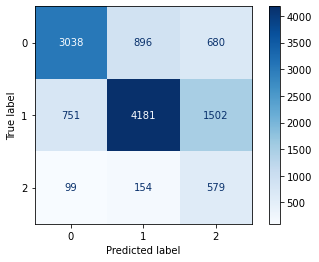

In [376]:
#plot confusion matrix
plot_confusion_matrix(logreg_clf, X_test, y_test, cmap = plt.cm.Blues)

AUC: 0.8182263779904473


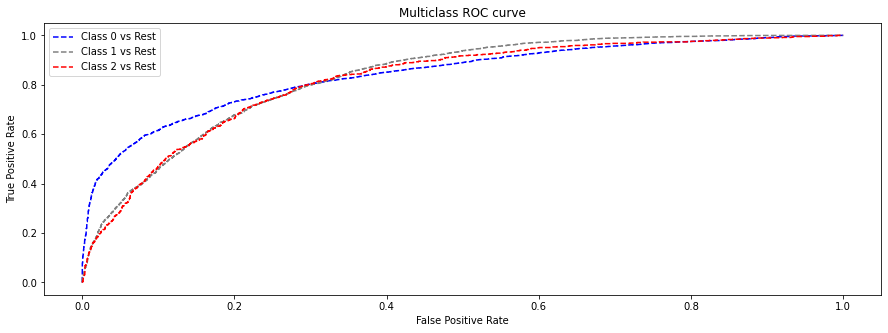

In [377]:
#get AUC
logreg_y_score = logreg_clf.fit(X_train, y_train).decision_function(X_test)

#roc curve for classes
logreg_fpr = {}
logreg_tpr = {}
logreg_thresh = {}

n_class = 3

for i in range(n_class):    
    logreg_fpr[i], logreg_tpr[i], logreg_thresh[i] = roc_curve(y_test, logreg_y_score[:, i], pos_label = i)

# plotting
plt.figure(figsize = (15, 5))
plt.plot(logreg_fpr[0], logreg_tpr[0], linestyle = '--',color = 'blue', label = 'Class 0 vs Rest')
plt.plot(logreg_fpr[1], logreg_tpr[1], linestyle = '--',color = 'gray', label = 'Class 1 vs Rest')
plt.plot(logreg_fpr[2], logreg_tpr[2], linestyle = '--',color = 'red', label = 'Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')

plt.savefig('./Data/logreg_roc')

#get AUC
print('AUC:', auc(logreg_fpr[i], logreg_tpr[i]))

In [378]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.22348484848484848
0.5506807057669854


In [379]:
#summary table
summary_table.loc[1] = ['Logistic Regression',
                        round(logreg_test_accuracy, 2), round(logreg_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        round(auc(logreg_fpr[i], logreg_tpr[i]), 2), bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Logistic Regression,75.03,0.74,0.67,0.56,0.58,0.30,0.41,0.64,0.82,-0.165152,0.269192
2,Logistic Regression,65.64,0.74,0.60,0.67,0.58,0.41,0.54,0.74,0.82,0.223485,0.550681
1,Decision Tree,69.22,0.69,0.60,0.65,0.61,0.35,0.44,0.66,-,0.079125,0.461963


# K-Nearest Neighbor

In [380]:
#instantiate baseline model
knn_clf = KNeighborsClassifier()

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

Train accuracy: 87.69925782510487
Test accuracy: 73.04713804713805


In [381]:
#set param grid
knn_param_grid = {"n_neighbors" : [3, 5, 7, 10],
                  'weights' : ['uniform', 'distance']}

#gridsearch
knn_gridsearch = GridSearchCV(estimator = knn_clf,
                             param_grid = knn_param_grid,
                             scoring = 'accuracy', cv = 5,
                             n_jobs = -1)

#fit
knn_gridsearch.fit(X_train, y_train)

#best param
knn_gridsearch.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [393]:
#get cross-validation result
knn_cross_val_results = pd.DataFrame(knn_gridsearch.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(knn_cross_val_results))

knn_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 8


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.227746,0.014654,77.999129,1.486565,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.795224,0.816586,0.819426,0.831429,0.847951,0.822123,0.017408,5
1,0.305427,0.130589,76.766878,1.969014,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.797289,0.831300,0.830784,0.843304,0.866409,0.833817,0.022370,1
2,0.574865,0.009344,80.044498,1.627794,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.787932,0.801807,0.803614,0.816263,0.835560,0.809035,0.016017,6
3,0.570200,0.021274,79.622086,1.327898,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.798387,0.828203,0.829558,0.838658,0.864085,0.831778,0.021089,2
4,0.479950,0.089972,73.557507,0.810058,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.776121,0.789158,0.789997,0.805163,0.819297,0.795947,0.014864,7


In [382]:
#train a classifier with optimal values identified above
knn_clf = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

Train accuracy: 99.7160374314295
Test accuracy: 74.7895622895623


In [383]:
#train cross validation
knn_train_cv_score = cross_val_score(knn_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', knn_train_cv_score)

#test cross validation
knn_test_cv_score = cross_val_score(knn_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', knn_test_cv_score)

Train cross validation: 0.8338173604388512
Test cross validation: 0.7227272727272727


In [384]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2878787878787879
Mean Squared Error: 0.35942760942760943
Root Mean Squared Error: 0.5995228181042065


In [385]:
#classification report
knn_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', knn_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      4614
           1       0.81      0.78      0.80      6434
           2       0.32      0.48      0.38       832

    accuracy                           0.75     11880
   macro avg       0.64      0.67      0.65     11880
weighted avg       0.76      0.75      0.76     11880



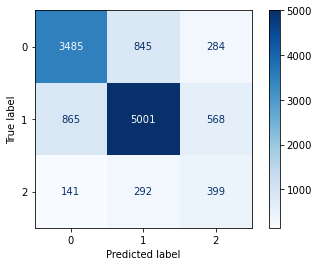

In [386]:
#plot
plot_confusion_matrix(knn_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [387]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.04562289562289562
0.4089531680440771


In [388]:
#summary table
summary_table.loc[2] = ['KNN',
                        round(knn_test_accuracy, 2), round(knn_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Logistic Regression,75.03,0.74,0.67,0.56,0.58,0.30,0.41,0.64,0.82,-0.165152,0.269192
2,Logistic Regression,65.64,0.74,0.60,0.67,0.58,0.41,0.54,0.74,0.82,0.223485,0.550681
1,Decision Tree,69.22,0.69,0.60,0.65,0.61,0.35,0.44,0.66,-,0.079125,0.461963
3,KNN,74.79,0.72,0.64,0.67,0.65,0.29,0.36,0.60,-,0.045623,0.408953


# Bagged Tree

In [389]:
#instantiate baseline model
bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 21,
                                                           criterion = 'gini',
                                                           max_depth = 40,
                                                           max_features = 'auto',
                                                           min_samples_leaf = 3,
                                                           min_samples_split = 8),
                                    random_state = 21)

#fit
bagged_tree_clf.fit(X_train, y_train)

#predict
y_hat_test = bagged_tree_clf.predict(X_test)
y_hat_train = bagged_tree_clf.predict(X_train)

#train accuracy
bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

Train accuracy: 87.50435624394967
Test accuracy: 76.20370370370371


In [394]:
#set param grid
n_samples = X.shape[0]
n_features = X.shape[1]

bagged_tree_param_grid = {'n_estimators' : [20, 50, 100],
                          'max_samples': [1, 5, 10, 20, 50],
                          'max_features': [1, 5, 10, 20, 50]}

#gridsearch
bagged_tree_gridsearch = GridSearchCV(estimator = bagged_tree_clf, 
                                        param_grid = bagged_tree_param_grid,
                                        scoring = 'accuracy', cv = 5,
                                        n_jobs = -1)

#fit
bagged_tree_gridsearch.fit(X_train, y_train)

#best param
bagged_tree_gridsearch.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 50,
 'max_samples': 50,
 'n_estimators': 100}

In [395]:
#get cross-validation result
bagged_tree_cross_val_results = pd.DataFrame(bagged_tree_gridsearch.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(bagged_tree_cross_val_results))

bagged_tree_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 300


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_bootstrap_features,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.890624,0.025599,0.039545,0.001341,True,True,1,1,20,"{'bootstrap': True, 'bootstrap_features': True...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,175
1,1.203876,0.009477,0.112762,0.002822,True,True,1,1,50,"{'bootstrap': True, 'bootstrap_features': True...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,175
2,1.809732,0.015691,0.170906,0.010017,True,True,1,1,100,"{'bootstrap': True, 'bootstrap_features': True...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,175
3,0.803783,0.021579,0.040256,0.001571,True,True,1,5,20,"{'bootstrap': True, 'bootstrap_features': True...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,175
4,0.874628,0.011505,0.091408,0.003560,True,True,1,5,50,"{'bootstrap': True, 'bootstrap_features': True...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.0,175


In [396]:
#train a classifier with optimal values identified above
bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 21,
                                                           criterion = 'gini',
                                                           max_depth = 40,
                                                           max_features = 'auto',
                                                           min_samples_leaf = 3,
                                                           min_samples_split = 8),
                                    random_state = 21,
                                    max_features = 50,
                                    max_samples = 50,
                                    n_estimators = 100)

#fit
bagged_tree_clf.fit(X_train, y_train)

#predict
y_hat_test = bagged_tree_clf.predict(X_test)
y_hat_train = bagged_tree_clf.predict(X_train)

#train accuracy
bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

Train accuracy: 52.438851242336234
Test accuracy: 55.19360269360269


In [397]:
#train cross validation
bagged_tree_train_cv_score = cross_val_score(bagged_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', bagged_tree_train_cv_score)

#test cross validation
bagged_tree_test_cv_score = cross_val_score(bagged_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', bagged_tree_test_cv_score)

Test cross validation: 0.5328428525330752
Train cross validation: 0.5733164983164982


In [398]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.5228956228956229
Mean Squared Error: 0.6725589225589226
Root Mean Squared Error: 0.820096898274175


In [399]:
#classification report
bagged_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: Bagged Tree', '\n', bagged_tree_classification_report)

Model: Bagged Tree 
               precision    recall  f1-score   support

           0       0.56      0.61      0.59      4614
           1       0.71      0.53      0.61      6434
           2       0.16      0.38      0.22       832

    accuracy                           0.55     11880
   macro avg       0.48      0.51      0.47     11880
weighted avg       0.61      0.55      0.57     11880



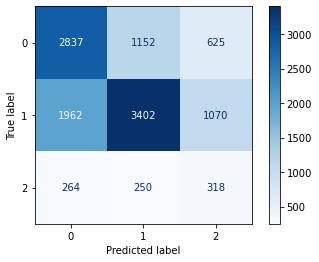

In [400]:
#plot confusion matrix
plot_confusion_matrix(bagged_tree_clf, X_test, y_test, cmap = plt.cm.Blues)

In [401]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.06161616161616162
0.5297105454091985


In [402]:
#summary table
summary_table.loc[3] = ['Bagged Tree',
                        round(bagged_tree_test_accuracy, 2), round(bagged_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Logistic Regression,75.03,0.74,0.67,0.56,0.58,0.30,0.41,0.64,0.82,-0.165152,0.269192
2,Logistic Regression,65.64,0.74,0.60,0.67,0.58,0.41,0.54,0.74,0.82,0.223485,0.550681
1,Decision Tree,69.22,0.69,0.60,0.65,0.61,0.35,0.44,0.66,-,0.079125,0.461963
3,KNN,74.79,0.72,0.64,0.67,0.65,0.29,0.36,0.60,-,0.045623,0.408953
4,Bagged Tree,55.19,0.57,0.48,0.51,0.47,0.52,0.67,0.82,-,0.061616,0.529711


# Random Forest

In [403]:
#instantiate baseline model
random_forest_clf = RandomForestClassifier(random_state = 21)

#fit
random_forest_clf.fit(X_train, y_train)

#predict
y_hat_train = random_forest_clf.predict(X_train)
y_hat_test = random_forest_clf.predict(X_test)

#train accuracy
random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(random_forest_test_accuracy))

Train accuracy: 99.80380767989674
Test accuracy: 79.42760942760943


In [404]:
#set param grid
random_forest_param_grid = {'n_estimators' : [20, 50, 100],
                            'criterion' : ['gini', 'entropy'],
                            'min_samples_split' : [8, 10, 12],
                            'min_samples_leaf' : [3, 4, 5],
                            'max_depth': [40, 80, 90, 100],
                            'max_features': ['auto', 'sqrt', 'log2']}

#gridsearch
random_forest_gridsearch = GridSearchCV(estimator = random_forest_clf, 
                                        param_grid = random_forest_param_grid,
                                        scoring = 'accuracy', cv = 5,
                                        n_jobs = -1)

#fit
random_forest_gridsearch.fit(X_train, y_train)

#best param
random_forest_gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [405]:
#get cross-validation result
random_forest_cross_val_results = pd.DataFrame(random_forest_gridsearch.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(random_forest_cross_val_results))

random_forest_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 648


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.296644,0.177103,0.169011,0.004758,gini,40,auto,3,8,20,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.788641,0.830849,0.826460,0.838916,0.842078,0.825389,0.019198,105
1,15.116637,0.369859,0.432651,0.012092,gini,40,auto,3,8,50,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.792707,0.834205,0.836205,0.845305,0.849113,0.831507,0.020175,23
2,29.721372,0.120499,0.775921,0.024168,gini,40,auto,3,8,100,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.796128,0.833366,0.835947,0.844724,0.851242,0.832281,0.019163,1
3,6.231986,0.134953,0.176335,0.008361,gini,40,auto,3,10,20,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.788835,0.823491,0.826654,0.835108,0.835818,0.821981,0.017243,159
4,15.087884,0.164234,0.399618,0.005261,gini,40,auto,3,10,50,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.793740,0.829364,0.833624,0.839948,0.843821,0.828099,0.017890,79


In [406]:
#train a classifier with optimal values identified above
random_forest_clf = RandomForestClassifier(random_state = 21, 
                                           criterion = 'gini',
                                           max_depth = 40,
                                           max_features = 'auto',
                                           min_samples_leaf = 3,
                                           min_samples_split = 8,
                                           n_estimators = 100)

#fit
random_forest_clf.fit(X_train, y_train)

#predict
y_hat_train = random_forest_clf.predict(X_train)
y_hat_test = random_forest_clf.predict(X_test)

#train accuracy
random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(random_forest_test_accuracy))

Train accuracy: 88.53049370764762
Test accuracy: 76.91077441077441


In [407]:
#train cross validation
random_forest_train_cv_score = cross_val_score(random_forest_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', random_forest_train_cv_score)

#test cross validation
random_forest_test_cv_score = cross_val_score(random_forest_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', random_forest_test_cv_score)

Train cross validation: 0.8322813810906744
Test cross validation: 0.7614478114478114


In [408]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.26346801346801346
Mean Squared Error: 0.32861952861952864
Root Mean Squared Error: 0.5732534593175419


In [409]:
#classification report
random_forest_classification_report = classification_report(y_test, y_hat_test)
print('Model: Random Forest', '\n', random_forest_classification_report)

Model: Random Forest 
               precision    recall  f1-score   support

           0       0.83      0.76      0.80      4614
           1       0.83      0.80      0.81      6434
           2       0.33      0.60      0.43       832

    accuracy                           0.77     11880
   macro avg       0.67      0.72      0.68     11880
weighted avg       0.80      0.77      0.78     11880



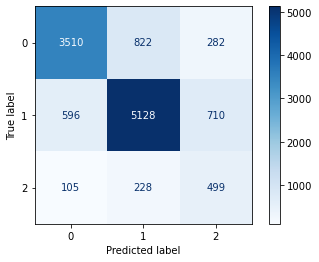

In [410]:
#plot confusion matrix
plot_confusion_matrix(random_forest_clf, X_test, y_test, cmap = plt.cm.Blues)

In [411]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.0893939393939394
0.4275453751884728


In [412]:
#summary table
summary_table.loc[4] = ['Random Forest',
                        round(random_forest_test_accuracy, 2), round(random_forest_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Logistic Regression,75.03,0.74,0.67,0.56,0.58,0.30,0.41,0.64,0.82,-0.165152,0.269192
2,Logistic Regression,65.64,0.74,0.60,0.67,0.58,0.41,0.54,0.74,0.82,0.223485,0.550681
1,Decision Tree,69.22,0.69,0.60,0.65,0.61,0.35,0.44,0.66,-,0.079125,0.461963
3,KNN,74.79,0.72,0.64,0.67,0.65,0.29,0.36,0.60,-,0.045623,0.408953
4,Random Forest,76.91,0.76,0.67,0.72,0.68,0.26,0.33,0.57,-,0.089394,0.427545


# Gradient Boosting

In [413]:
#instantiate baseline model
gradient_boost_clf = GradientBoostingClassifier(random_state = 21,
                                                max_depth = 40,
                                                max_features = 'auto',
                                                min_samples_leaf = 3,
                                                min_samples_split = 8,
                                                n_estimators = 100)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

Train accuracy: 99.80509841884478
Test accuracy: 79.58754208754209


In [414]:
#set param grid
gradient_boost_param_grid = {'learning_rate': [0.01, 0.025, 0.05],
                             'subsample': [0.5, 0.8, 1.0]}

#gridsearch
gradient_boost_gridsearch = GridSearchCV(estimator = gradient_boost_clf,
                                         param_grid = gradient_boost_param_grid, 
                                         scoring = 'accuracy',
                                         n_jobs = -1,
                                         cv = 5)

#fit
gradient_boost_gridsearch.fit(X_train, y_train)

#best param
gradient_boost_gridsearch.best_params_

{'learning_rate': 0.05, 'subsample': 0.5}

In [415]:
#get cross-validation result
gradient_boost_cross_val_results = pd.DataFrame(gradient_boost_gridsearch.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(gradient_boost_cross_val_results))

gradient_boost_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 9


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1063.280611,6.400122,2.531589,0.069140,0.01,0.5,"{'learning_rate': 0.01, 'subsample': 0.5}",0.808971,0.865828,0.867247,0.877122,0.887641,0.861362,0.027344,7
1,3828.541333,34.523492,6.174996,0.237433,0.01,0.8,"{'learning_rate': 0.01, 'subsample': 0.8}",0.808971,0.867893,0.868667,0.883124,0.892030,0.864137,0.029039,5
2,6814.524971,27.924772,3.287249,0.051272,0.01,1,"{'learning_rate': 0.01, 'subsample': 1.0}",0.794579,0.851371,0.857373,0.869313,0.877832,0.850094,0.029241,9
3,1111.332214,3.907094,2.560229,0.105365,0.025,0.5,"{'learning_rate': 0.025, 'subsample': 0.5}",0.811810,0.871701,0.871959,0.885060,0.892675,0.866641,0.028556,3
4,6292.879076,11.569284,3.443209,0.085396,0.025,0.8,"{'learning_rate': 0.025, 'subsample': 0.8}",0.810842,0.870797,0.870281,0.884543,0.896418,0.866576,0.029500,4


In [417]:
#train a classifier with optimal values identified above
gradient_boost_clf = GradientBoostingClassifier(random_state = 21,
                                  learning_rate = 0.05,
                                  subsample = 0.5)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

Train accuracy: 71.08228460793804
Test accuracy: 68.493265993266


In [418]:
#train cross validation
gradient_boost_train_cv_score = cross_val_score(gradient_boost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_train_cv_score)

#test cross validation
gradient_boost_test_cv_score = cross_val_score(gradient_boost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_test_cv_score)

Train cross validation: 0.7065505001613424
Train cross validation: 0.7456228956228956


In [419]:
#evaluate
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.3659090909090909
Mean Squared Error: 0.4675925925925926
Root Mean Squared Error: 0.6838074236161762


In [420]:
#classification report
gradient_boost_classification_report = classification_report(y_test, y_hat_test)
print('Model: Gradient Boosting', '\n', gradient_boost_classification_report)

Model: Gradient Boosting 
               precision    recall  f1-score   support

           0       0.80      0.64      0.71      4614
           1       0.77      0.73      0.75      6434
           2       0.23      0.58      0.33       832

    accuracy                           0.68     11880
   macro avg       0.60      0.65      0.60     11880
weighted avg       0.74      0.68      0.71     11880



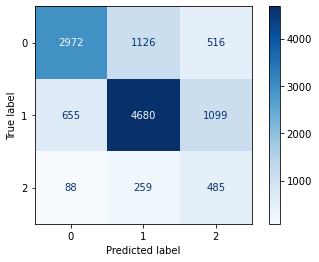

In [421]:
#plot confusion matrix
plot_confusion_matrix(gradient_boost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [422]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.1824074074074074
0.4709976802253738


In [423]:
#summary table
summary_table.loc[5] = ['Gradient Boost',
                        round(gradient_boost_test_accuracy, 2), round(gradient_boost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Logistic Regression,75.03,0.74,0.67,0.56,0.58,0.30,0.41,0.64,0.82,-0.165152,0.269192
2,Logistic Regression,65.64,0.74,0.60,0.67,0.58,0.41,0.54,0.74,0.82,0.223485,0.550681
1,Decision Tree,69.22,0.69,0.60,0.65,0.61,0.35,0.44,0.66,-,0.079125,0.461963
3,KNN,74.79,0.72,0.64,0.67,0.65,0.29,0.36,0.60,-,0.045623,0.408953
4,Random Forest,76.91,0.76,0.67,0.72,0.68,0.26,0.33,0.57,-,0.089394,0.427545


# AdaBoost

In [424]:
#instantiate baseline model
adaboost_clf = AdaBoostClassifier(random_state = 21)

#fit
adaboost_clf.fit(X_train, y_train)

#predict
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

#train accuracy
adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0} '.format(adaboost_train_accuracy))

#test accuracy
adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0} '.format(adaboost_test_accuracy))

Train accuracy: 65.29590190383995 
Test accuracy: 63.122895622895626 


In [425]:
#param
adaboost_param_grid = {'learning_rate': [0.01, 0.025, 0.05],
                       'n_estimators' : [20, 50, 100]}

#gridsearch
adaboost_gridsearch = GridSearchCV(estimator = adaboost_clf,
                                   param_grid = adaboost_param_grid,
                                   scoring = 'accuracy',
                                   n_jobs = -1,
                                   cv = 5)

#fit
adaboost_gridsearch.fit(X_train, y_train)

#best param
adaboost_gridsearch.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

In [426]:
#get cross-validation result
adaboost_cross_val_results = pd.DataFrame(adaboost_gridsearch.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(adaboost_cross_val_results))

adaboost_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 9


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,29.261327,0.422242,0.697362,0.024153,0.01,20,"{'learning_rate': 0.01, 'n_estimators': 20}",0.456922,0.463956,0.463956,0.459503,0.458341,0.460536,0.002910,9
1,73.909179,0.367680,1.733230,0.047455,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.457373,0.464666,0.464472,0.459761,0.458858,0.461026,0.002992,8
2,145.455450,0.708682,3.098091,0.162893,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.507002,0.529719,0.524556,0.525008,0.517909,0.520839,0.007875,4
3,30.063511,0.547768,0.705524,0.010443,0.025,20,"{'learning_rate': 0.025, 'n_estimators': 20}",0.457373,0.464408,0.464472,0.460600,0.458922,0.461155,0.002870,7
4,73.790877,0.534223,1.746942,0.012835,0.025,50,"{'learning_rate': 0.025, 'n_estimators': 50}",0.507002,0.529719,0.524298,0.525073,0.517909,0.520800,0.007859,5


In [427]:
#train a classifier with optimal values identified above
adaboost_clf = AdaBoostClassifier(random_state = 21,
                                  learning_rate = 0.05,
                                  n_estimators = 100)

#fit
adaboost_clf.fit(X_train, y_train)

#predict
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

#train accuracy
adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', adaboost_train_accuracy)

#test accuracy
adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', adaboost_test_accuracy)

Train accuracy: 55.2539528880284
Test accuracy: 57.43265993265994


In [428]:
#train cross validation
adaboost_train_cv_score = cross_val_score(adaboost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', adaboost_train_cv_score)

#test cross validation
adaboost_test_cv_score = cross_val_score(adaboost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', adaboost_test_cv_score)

Train cross validation: 0.5490029041626332
Test cross validation: 0.6485690235690236


In [429]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.5247474747474747
Mean Squared Error: 0.7228956228956229
Root Mean Squared Error: 0.8502326875012646


In [430]:
#classification report
adaboost_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', adaboost_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.66      0.50      0.57      4614
           1       0.72      0.64      0.68      6434
           2       0.14      0.46      0.22       832

    accuracy                           0.57     11880
   macro avg       0.51      0.53      0.49     11880
weighted avg       0.66      0.57      0.60     11880



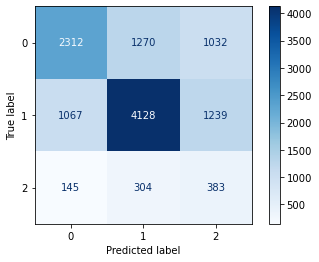

In [431]:
#plot confusion matrix
plot_confusion_matrix(adaboost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [432]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.24511784511784512
0.5146706968676666


In [433]:
#summary table
summary_table.loc[6] = ['ADABoost',
                        round(adaboost_test_accuracy, 2), round(adaboost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Imbalance Logistic Regression,75.03,0.74,0.67,0.56,0.58,0.30,0.41,0.64,0.82,-0.165152,0.269192
2,Logistic Regression,65.64,0.74,0.60,0.67,0.58,0.41,0.54,0.74,0.82,0.223485,0.550681
1,Decision Tree,69.22,0.69,0.60,0.65,0.61,0.35,0.44,0.66,-,0.079125,0.461963
3,KNN,74.79,0.72,0.64,0.67,0.65,0.29,0.36,0.60,-,0.045623,0.408953
4,Random Forest,76.91,0.76,0.67,0.72,0.68,0.26,0.33,0.57,-,0.089394,0.427545


# XGBoost

In [434]:
#instantiate baseline model
xgb_clf = xgb.XGBClassifier(random_state = 21)

#train a classifier with optimal values identified above
xgb_clf = xgb.XGBClassifier(random_state = 21)

#fit
xgb_clf.fit(X_train, y_train)

#predict
y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

#train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', xgb_train_accuracy)

#test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', xgb_test_accuracy)

Train accuracy: 86.04711197160374
Test accuracy: 77.22222222222223


In [ ]:
#set param grid
xgb_param_grid = {"n_estimators" : [20, 50, 100, 200, 300],
                  'max_depth': [80, 90, 100, 110]}

#gridsearch
xgb_gridsearch = GridSearchCV(estimator = xgb_clf, 
                                        param_grid = xgb_param_grid,
                                        scoring = 'accuracy', cv = 5,
                                        n_jobs = -1)

#fit
xgb_gridsearch.fit(X_train, y_train)

#best param
xgb_gridsearch.best_params_

In [ ]:
#get cross-validation result
xgb_cross_val_results = pd.DataFrame(xgb_gridsearch.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(xgb_cross_val_results))

xgb_cross_val_results.head()

In [147]:
#train a classifier with optimal values identified above
xgb_clf = xgb.XGBClassifier(random_state = 21)

#fit
xgb_clf.fit(X_train, y_train)

#predict
y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

#train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', xgb_train_accuracy)

#test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', xgb_test_accuracy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [151]:
#train cross validation
xgb_train_cv_score = cross_val_score(xgb_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', xgb_train_cv_score)

#test cross validation
xgb_test_cv_score = cross_val_score(xgb_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', xgb_test_cv_score)

Train cross validation: 0.7984769280413037
Test cross validation: 0.776010101010101


In [153]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.4868686868686869
Mean Squared Error: 0.717003367003367
Root Mean Squared Error: 0.8467605133704376


In [154]:
#classification report
xgb_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', xgb_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      6434
           1       0.72      0.56      0.63      4614
           2       0.20      0.54      0.29       832

    accuracy                           0.63     11880
   macro avg       0.55      0.60      0.54     11880
weighted avg       0.69      0.63      0.65     11880



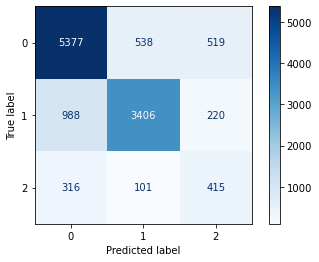

In [155]:
#plot confusion matrix
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap = plt.cm.Blues)

In [ ]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

In [156]:
#summary table
summary_table.loc[7] = ['XGBoost',
                        round(xgb_test_accuracy, 2), round(xgb_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC
0,Logistic Regression,70.70,0.74,0.60,0.62,0.60,0.38,0.55,0.74,0.77
7,XGBoost,62.82,0.78,0.55,0.60,0.54,0.49,0.72,0.85,-


# Support Vector Machine

In [ ]:
#instantiate baseline model
svm_clf = SVC(random_state = 21)

#fit
svm_clf.fit(X_train, y_train)

#predict
y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

#train accuracy
svm_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', svm_train_accuracy)

#test accuracy
svm_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', svm_test_accuracy)

In [ ]:
#set param grid
svm_param_grid = {'C' : [1000000, 3000000, 5000000],
                  'degree': [1, 2, 3, 4],
                  'gamma': ['scale', 'auto'],
                  'decision_function_shape': ['ovo', 'ovr']}

#gridsearch
svm_gridsearch = GridSearchCV(estimator = svm_clf,
                              param_grid = svm_param_grid,
                              scoring = 'accuracy', cv = 5,
                              n_jobs = -1)

#fit
svm_gridsearch.fit(X_train, y_train)

#best param
svm_gridsearch.best_params_

In [ ]:
#train a classifier with optimal values identified above
svm_clf = SVC(random_state = 21)

#fit
svm_clf.fit(X_train, y_train)

#predict
y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

#train accuracy
svm_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', svm_train_accuracy)

#test accuracy
svm_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', svm_test_accuracy)

In [ ]:
#train cross validation
svm_train_cv_score = cross_val_score(svm_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', svm_train_cv_score)

#test cross validation
svm_test_cv_score = cross_val_score(svm_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', svm_test_cv_score)

In [ ]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

In [ ]:
#classification report
svm_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', svm_classification_report)

In [ ]:
#plot confusion matrix
plot_confusion_matrix(svm_clf, X_test, y_test, cmap = plt.cm.Blues)

In [ ]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

In [ ]:
#summary table
summary_table.loc[8] = ['SVM',
                        round(svm_test_accuracy, 2), round(svm_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

# Models Comparison

TypeError: boxplot() got an unexpected keyword argument 's'

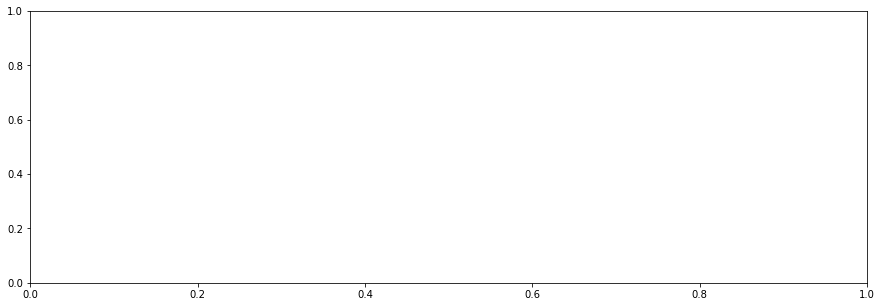

In [248]:
#plot accuracy
plt.figure(figsize = (15, 5))
sns.boxplot(x = summary_table['Accuracy'], y = summary_table['Model'], s = 100, marker = 'o')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title("Accuracy Comparison")

plt.savefig('./Data/models_comparison')

# Submission Dataframe

In [ ]:
prediction = clf.predict(test_values[features])
prediction_df = pd.DataFrame(prediction, columns=["status_group"])
submission = pd.merge(test_values.id.reset_index()["id"].to_frame(), prediction_df, right_index = True, left_index = True)
submission.head()
submission.to_csv("sub.csv", index = False)